# PyTorch Basics: Tensors & Gradients

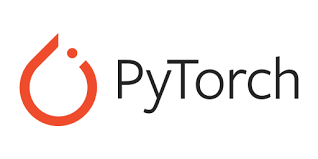



  PyTorch is an open-source machine learning framework that is primarily used for developing and training deep learning models. It was developed by Facebook's AI Research Lab and released in 2016. PyTorch provides a flexible and dynamic approach to building neural networks, making it a popular choice among researchers and developers.

The framework is built on a dynamic computational graph concept, which means that the graph is built and modified on-the-fly as the program runs. This allows for more intuitive and flexible model development, as you can use standard Python control flow statements and debug the model easily.

PyTorch supports automatic differentiation, which enables efficient computation of gradients for training neural networks using backpropagation. It provides a rich set of tools and libraries for tasks such as data loading, model building, optimization, and evaluation.

One of the key advantages of PyTorch is its support for GPU acceleration, allowing you to train models on GPUs to significantly speed up computations. It also has a large and active community, which means there are plenty of resources, tutorials, and pre-trained models available.

PyTorch is often compared to TensorFlow, another popular deep learning framework. While TensorFlow focuses more on static computation graphs, PyTorch emphasizes dynamic computation graphs. This fundamental difference in design philosophy gives PyTorch an edge when it comes to flexibility and ease of use.

Overall, PyTorch is widely used in the research community and is gaining popularity in industry applications as well. It provides a powerful and user-friendly platform for building and training deep learning models.



## installation

installation instructions here: https://pytorch.org .

In [233]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy torch torchvision torchaudio

Let's import the `torch` module to get started.

In [234]:
import torch

## Tensors

At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix, or any n-dimensional array. Let's create a tensor with a single number.

In [235]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

`4.` is a shorthand for `4.0`. It is used to indicate to Python (and PyTorch) that you want to create a floating-point number. We can verify this by checking the `dtype` attribute of our tensor.

In [236]:
t1.dtype

torch.float32

Let's try creating more complex tensors.

In [237]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [238]:
# Matrix
t3 = torch.tensor([[5., 6],
                   [7, 8],
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [239]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13],
     [13, 14, 15]],
    [[15, 16, 17],
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

Tensors can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of a tensor.

In [240]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [241]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [242]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [243]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

Note that it's not possible to create tensors with an improper shape.

In [244]:
# # Matrix
# t5 = torch.tensor([[5., 6, 11],
#                 [7, 8],
#                 [9, 10]])
# t5

A `ValueError` is thrown because the lengths of the rows `[5., 6, 11]` and `[7, 8]` don't match.

## Tensor operations and gradients

We can combine tensors with the usual arithmetic operations. Let's look at an example:

In [245]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

We've created three tensors: `x`, `w`, and `b`, all numbers. `w` and `b` have an additional parameter `requires_grad` set to `True`. We'll see what it does in just a moment.

Let's create a new tensor `y` by combining these tensors.

In [246]:
# Arithmetic operations
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

As expected, `y` is a tensor with the value `3 * 4 + 5 = 17`. What makes PyTorch unique is that we can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. w and b. This feature of PyTorch is called _autograd_ (automatic gradients).

To compute the derivatives, we can invoke the `.backward` method on our result `y`.

In [247]:
# Compute derivatives
y.backward()

The derivatives of `y` with respect to the input tensors are stored in the `.grad` property of the respective tensors.

In [248]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, `dy/dw` has the same value as `x`, i.e., `3`, and `dy/db` has the value `1`. Note that `x.grad` is `None` because `x` doesn't have `requires_grad` set to `True`.

The "grad" in `w.grad` is short for _gradient_, which is another term for derivative. The term _gradient_ is primarily used while dealing with vectors and matrices.

## Tensor functions

Apart from arithmetic operations, the `torch` module also contains many functions for creating and manipulating tensors. Let's look at some examples.

In [249]:
# Create a tensor with a fixed value for every element
t6 = torch.full((3, 2), 42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [250]:
# Concatenate two tensors with compatible shapes
t7 = torch.cat((t3, t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [251]:
# Compute the sin of each element
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [252]:
# Change the shape of a tensor
t9 = t8.reshape(3, 2, 2)
t9

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

You can learn more about tensor operations here: https://pytorch.org/docs/stable/torch.html . Experiment with some more tensor functions and operations using the empty cells below.

## Interoperability with Numpy

[Numpy](http://www.numpy.org/) is a popular open-source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays and has a vast ecosystem of supporting libraries, including:

* [Pandas](https://pandas.pydata.org/) for file I/O and data analysis
* [Matplotlib](https://matplotlib.org/) for plotting and visualization
* [OpenCV](https://opencv.org/) for image and video processing


Instead of reinventing the wheel, PyTorch interoperates well with Numpy to leverage its existing ecosystem of tools and libraries.

Here's how we create an array in Numpy:

In [253]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`.

In [254]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Let's verify that the numpy array and torch tensor have similar data types.

In [255]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

We can convert a PyTorch tensor to a Numpy array using the `.numpy` method of a tensor.

In [256]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

The interoperability between PyTorch and Numpy is essential because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

You might wonder why we need a library like PyTorch at all since Numpy already provides data structures and utilities for working with multi-dimensional numeric data. There are two main reasons:

1. **Autograd**: The ability to automatically compute gradients for tensor operations is essential for training deep learning models.
2. **GPU support**: While working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a Graphics Processing Unit (GPU). Computations that might typically take hours can be completed within minutes using GPUs.



## Linear-regression from scrach using pytorch

In [257]:
import numpy as np
import torch

In [258]:
#making training data
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [259]:
# Targets (apples, oranges)
target = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [260]:
#Convert input and target to tensors
inputs = torch.from_numpy(inputs)
target = torch.from_numpy(target)

print(inputs,"\n")
print(target)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]]) 

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [261]:
# weights and biases
w = torch.randn(2,3 , requires_grad=True)
b = torch.randn(2, requires_grad=True)

print(w)
print(b)

tensor([[ 0.4009, -0.0544,  0.0108],
        [ 0.8357, -0.5979, -0.2274]], requires_grad=True)
tensor([ 0.2382, -0.5217], requires_grad=True)


In [262]:
#define the model

def model(x):
  return x @ w.t() + b

In [263]:
# prediction
preds = model(inputs)
print(preds)

tensor([[ 26.3210,  10.6475],
        [ 32.6207,   8.3591],
        [ 28.4500, -21.1239],
        [ 39.1875,  50.5975],
        [ 23.4308, -16.1742]], grad_fn=<AddBackward0>)


In [264]:
#actual
print(target)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [265]:
# loss function MSE
def MSE(actual, target):
  diff = actual - target
  return torch.sum(diff * diff) / diff.numel()

In [266]:
# error
loss = MSE(target, preds)
print(loss)

tensor(7236.3564, grad_fn=<DivBackward0>)


In [267]:
# compute gradients
loss.backward()

In [268]:
print(w, "\n")
print(w.grad)

tensor([[ 0.4009, -0.0544,  0.0108],
        [ 0.8357, -0.5979, -0.2274]], requires_grad=True) 

tensor([[-3636.8179, -5055.8315, -2911.6565],
        [-6822.3838, -9034.7314, -5275.8906]])


In [269]:
print(b, "\n")
print(b.grad)

tensor([ 0.2382, -0.5217], requires_grad=True) 

tensor([-46.1980, -85.5388])


In [270]:
#reset grad
w.grad.zero_()
b.grad.zero_()

print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [271]:
# adjust params

preds = model(inputs)
print(preds)

tensor([[ 26.3210,  10.6475],
        [ 32.6207,   8.3591],
        [ 28.4500, -21.1239],
        [ 39.1875,  50.5975],
        [ 23.4308, -16.1742]], grad_fn=<AddBackward0>)


In [272]:
# loss
loss = MSE(target, preds)
print(loss)

tensor(7236.3564, grad_fn=<DivBackward0>)


In [273]:
loss.backward()

print(w.grad, "\n")
print(b.grad)

tensor([[-3636.8179, -5055.8315, -2911.6565],
        [-6822.3838, -9034.7314, -5275.8906]]) 

tensor([-46.1980, -85.5388])


In [274]:
  # adjust weight & reset grad
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [275]:
print(w)
print(b)

tensor([[ 0.4372, -0.0038,  0.0399],
        [ 0.9039, -0.5076, -0.1746]], requires_grad=True)
tensor([ 0.2387, -0.5209], requires_grad=True)


In [276]:
# calculate again
preds = model(inputs)
loss = MSE(target, preds)
print(loss)

tensor(5383.8428, grad_fn=<DivBackward0>)


In [277]:
# Training for multiple epochs
for i in range(400):
  preds = model(inputs)
  loss = MSE(target, preds)
  loss.backward()

  with torch.no_grad():
     w -= w.grad * 1e-5 # learning rate
     b -= b.grad * 1e-5
     w.grad.zero_()
     b.grad.zero_()
  print(f"Epochs({i}/{100}) & Loss {loss}")

Epochs(0/100) & Loss 5383.8427734375
Epochs(1/100) & Loss 4129.19189453125
Epochs(2/100) & Loss 3277.509765625
Epochs(3/100) & Loss 2697.46044921875
Epochs(4/100) & Loss 2300.53955078125
Epochs(5/100) & Loss 2027.099853515625
Epochs(6/100) & Loss 1836.948486328125
Epochs(7/100) & Loss 1702.997802734375
Epochs(8/100) & Loss 1606.9931640625
Epochs(9/100) & Loss 1536.6318359375
Epochs(10/100) & Loss 1483.6224365234375
Epochs(11/100) & Loss 1442.376953125
Epochs(12/100) & Loss 1409.1282958984375
Epochs(13/100) & Loss 1381.337158203125
Epochs(14/100) & Loss 1357.291748046875
Epochs(15/100) & Loss 1335.8370361328125
Epochs(16/100) & Loss 1316.1943359375
Epochs(17/100) & Loss 1297.8385009765625
Epochs(18/100) & Loss 1280.4134521484375
Epochs(19/100) & Loss 1263.679443359375
Epochs(20/100) & Loss 1247.474365234375
Epochs(21/100) & Loss 1231.687255859375
Epochs(22/100) & Loss 1216.2431640625
Epochs(23/100) & Loss 1201.090576171875
Epochs(24/100) & Loss 1186.1943359375
Epochs(25/100) & Loss 1171

In [278]:
preds = model(inputs)
loss = MSE(target, preds)
print(loss)

tensor(28.5307, grad_fn=<DivBackward0>)


In [279]:
from math import sqrt
sqrt(loss)

5.341409806588877

In [280]:
preds

tensor([[ 58.2325,  71.8011],
        [ 80.5951,  97.9246],
        [120.6438, 136.8025],
        [ 26.8216,  45.8194],
        [ 95.8129, 109.1201]], grad_fn=<AddBackward0>)

In [281]:
target

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [282]:
## You can see they are almost close earch other

## Neural Network using Pytorch

In [283]:
# To check GPU
!nvidia-smi

Tue Nov 21 16:39:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   43C    P8     4W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [284]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch.utils.model_zoo'

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

NameError: name 'datasets' is not defined

In [ ]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    # print(X)
    # print(y)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.316672  [    0/60000]
loss: 2.299611  [ 6400/60000]
loss: 2.276056  [12800/60000]
loss: 2.267389  [19200/60000]
loss: 2.250305  [25600/60000]
loss: 2.210238  [32000/60000]
loss: 2.231450  [38400/60000]
loss: 2.190959  [44800/60000]
loss: 2.200532  [51200/60000]
loss: 2.153820  [57600/60000]
Test Error: 
 Accuracy: 36.2%, Avg loss: 2.147636 

Epoch 2
-------------------------------
loss: 2.171121  [    0/60000]
loss: 2.154280  [ 6400/60000]
loss: 2.090852  [12800/60000]
loss: 2.105507  [19200/60000]
loss: 2.051154  [25600/60000]
loss: 1.985906  [32000/60000]
loss: 2.021355  [38400/60000]
loss: 1.935196  [44800/60000]
loss: 1.952712  [51200/60000]
loss: 1.864827  [57600/60000]
Test Error: 
 Accuracy: 51.2%, Avg loss: 1.863941 

Epoch 3
-------------------------------
loss: 1.910603  [    0/60000]
loss: 1.873535  [ 6400/60000]
loss: 1.752214  [12800/60000]
loss: 1.789106  [19200/60000]
loss: 1.676216  [25600/60000]
loss: 1.630203  [32000/600

In [ ]:
#save model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
#load model
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
## Prediction

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
